In [2]:
import pandas as pd 
import numpy as np 

/Users/riyaazkhan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/riyaazkhan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('/Users/riyaazkhan/Documents/Imperial_Maths/Algorithmic_Trading_Club/Projects/AmazonItemRecommendations/int_online_tx.csv')

In [206]:
#This code is for transaction level clustering.
# I am also clustering based on product-level characteristics rather than overall transaction behavior.

In [207]:
#Encoding categorical data - Countries
#THIS CODE IS NOT GOOD FOR K-MEANS CLustering INSTEAD YOU SHOULD ONE HOT ENCODE

#dfcountries = list(set(df['Country'].values)) #dfcountries = 
#dfcountryarray = []
#for i in range(len(df)):
#    dfcountryarray.append(dfcountries.index(df['Country'][i]))
#df['Country'] = dfcountryarray

In [4]:
countries_split = df['Country'].str.get_dummies()
df = pd.concat([df, countries_split], axis=1)
df = df.drop(columns=['Country','InvoiceDate','InvoiceNo','CustomerID'])
dfcopy = df

In [5]:
#Frequency Encoding for StockCode
unavailableSC = []
for i in range(len(df)):
    try:
        df.loc[i,'StockCode'] = int(df['StockCode'][i])
    except ValueError:
        unavailableSC.append(i)
print(len((unavailableSC)))

3370


In [6]:
df = df.drop(index=unavailableSC)

In [7]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd

# Ensure 'StockCode' is in string format
df['StockCode'] = df['StockCode'].astype(str)

# Initialize FeatureHasher with the desired number of features
hasher = FeatureHasher(n_features=10, input_type='string')

# Transform the 'StockCode' column into hashed features
# Wrap the StockCode column values in a list (iterable of iterables)
hashed_features = hasher.transform([[code] for code in df['StockCode']])

# Convert the sparse matrix to a dense DataFrame
hashed_df = pd.DataFrame(hashed_features.toarray(), columns=[f'StockCode_hash_{i}' for i in range(10)])

# Concatenate the hashed features back to the original DataFrame
df = pd.concat([df.reset_index(drop=True), hashed_df.reset_index(drop=True)], axis=1)


In [8]:
dfstockitem = df[['StockCode','Description','StockCode_hash_0',
       'StockCode_hash_1', 'StockCode_hash_2', 'StockCode_hash_3',
       'StockCode_hash_4', 'StockCode_hash_5', 'StockCode_hash_6',
       'StockCode_hash_7', 'StockCode_hash_8', 'StockCode_hash_9',
       ]]
dfstockcitem = dfstockitem.drop_duplicates()
dfstockitem = dfstockitem.set_index('StockCode')
df.drop(columns = 'Description')
#dfstockitem.reindex(index=df['StockCode'])

,StockCode,Quantity,UnitPrice,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,...,StockCode_hash_0,StockCode_hash_1,StockCode_hash_2,StockCode_hash_3,StockCode_hash_4,StockCode_hash_5,StockCode_hash_6,StockCode_hash_7,StockCode_hash_8,StockCode_hash_9
0,22728,24,3.75,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
1,22727,24,3.75,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22726,12,3.75,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
3,21724,12,0.85,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,21883,24,0.65,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31741,22613,12,0.85,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
31742,22899,6,2.10,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31743,23254,4,4.15,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31744,23255,4,4.15,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Standardising Data - UnitPrice, Quantity
print(df['Quantity'].std())
NormQuantity = []
Quantity_std = df['Quantity'].std()
Quantity_mean = df['Quantity'].mean()

for i in range(len(df)):
    item1 = df['Quantity'][i]
    NewQuantity = (item1 - Quantity_mean)/(Quantity_std)
    NormQuantity.append(NewQuantity)
df['Quantity'] = NormQuantity

NormUnitPrice = []
UnitPrice_std = df['UnitPrice'].std()
UnitPrice_mean = df['UnitPrice'].mean()
for i in range(len(df)):
    item2 = df['UnitPrice'][i]
    NewUnitPrice = (item2 - UnitPrice_mean)/(UnitPrice_std)
    NormUnitPrice.append(NewUnitPrice)
df['UnitPrice'] = NormUnitPrice
    

31.938974138329392


In [217]:
#Another way to enocde stockcode by Calculate frequency of each StockCode
#stockcode_counts = df['StockCode'].value_counts()
#STM = df['StockCode'].mean()
#STSTD = df['StockCode'].std()
# Map the frequency count to each StockCode in the original dataframe
#df['StockCode_encoded'] = df['StockCode'].map(stockcode_counts) + (1/(df['StockCode'])
#print(len(list(set(df['StockCode']))))
#print(len(list(set(df['StockCode_encoded']))))
#df

In [14]:
clustercolumns = ['Quantity', 'UnitPrice', 'Australia', 'Austria', 'Bahrain',
       'Belgium', 'Brazil', 'Canada', 'Channel Islands', 'Cyprus',
       'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland',
       'France', 'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Israel',
       'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore',
       'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates',
       'Unspecified','StockCode_hash_0', 'StockCode_hash_1',
       'StockCode_hash_2', 'StockCode_hash_3', 'StockCode_hash_4',
       'StockCode_hash_5', 'StockCode_hash_6', 'StockCode_hash_7',
       'StockCode_hash_8', 'StockCode_hash_9'
        ]
from sklearn.preprocessing import StandardScaler
data_for_clustering = df[clustercolumns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)
df = pd.DataFrame(scaled_data,columns = clustercolumns)

In [12]:
df

,Quantity,UnitPrice,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,StockCode_hash_0,StockCode_hash_1,StockCode_hash_2,StockCode_hash_3,StockCode_hash_4,StockCode_hash_5,StockCode_hash_6,StockCode_hash_7,StockCode_hash_8,StockCode_hash_9
0,0.279950,0.223823,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,-0.089224,0.017011,0.024463,-0.093009,0.001464,0.022298,0.043072,-0.093073,-0.041366,-3.195750
1,0.279950,0.223823,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,-0.089224,0.017011,0.024463,-0.093009,0.001464,0.022298,0.043072,-0.093073,-0.041366,3.174080
2,-0.095772,0.223823,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,-0.089224,0.017011,0.024463,-0.093009,0.001464,-3.195248,0.043072,-0.093073,-0.041366,-0.010835
3,-0.095772,-0.552996,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,-0.089224,0.017011,0.024463,-0.093009,0.001464,0.022298,2.977332,-0.093073,-0.041366,-0.010835
4,0.279950,-0.606570,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,-0.089224,0.017011,0.024463,-0.093009,0.001464,0.022298,-2.891188,-0.093073,-0.041366,-0.010835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31741,-0.095772,-0.552996,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,-0.089224,0.017011,0.024463,-0.093009,0.001464,0.022298,0.043072,-0.093073,-3.109582,-0.010835
31742,-0.283633,-0.218160,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,-0.089224,0.017011,0.024463,3.300840,0.001464,0.022298,0.043072,-0.093073,-0.041366,-0.010835
31743,-0.346254,0.330970,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,-0.089224,0.017011,0.024463,-0.093009,3.320393,0.022298,0.043072,-0.093073,-0.041366,-0.010835
31744,-0.346254,0.330970,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,3.033713,0.017011,0.024463,-0.093009,0.001464,0.022298,0.043072,-0.093073,-0.041366,-0.010835


In [ ]:
# The following is for KMeans

In [219]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Compute inertia for different values of k
inertia = []
k_values = range(20, 100,1)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=4)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

KeyboardInterrupt: 

In [60]:
#From this we get an optimal k cluster number of 40

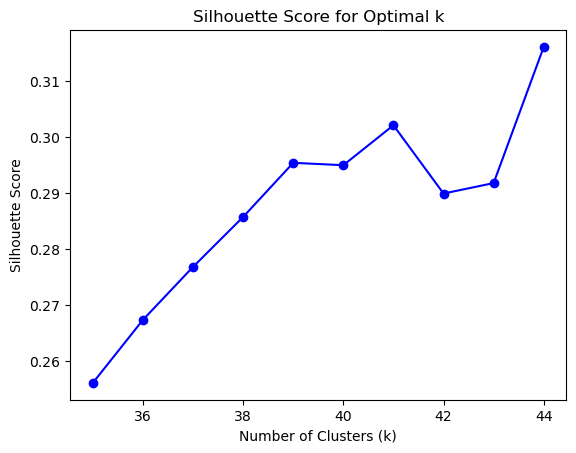

In [200]:
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

sampled_data = resample(scaled_data, n_samples=10000, random_state=4)  # Adjust n_samples as needed

# Compute silhouette scores for different values of k
silhouette_scores = []
for k in range(35, 45):
    kmeans = KMeans(n_clusters=k, random_state=4)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

# Plot silhouette scores
plt.plot(range(35,45), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

In [74]:
x = silhouette_scores

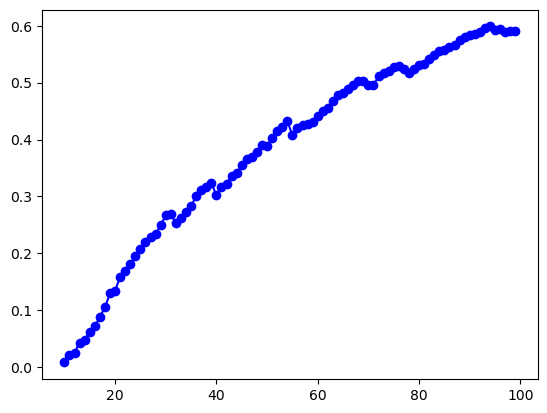

In [75]:
plt.plot(range(10,100), x, 'bo-')
plt.show()

In [77]:
#Here 60 works quite well, but 45 may also work

In [220]:
optimal_k = 40

# Fit K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=4)
kmeans.fit(scaled_data)

# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

KMeans(n_clusters=45, random_state=42)

In [222]:
from sklearn.cluster import KMeans
import pandas as pd

# Features to cluster
columns_to_cluster = ['Quantity', 'UnitPrice']

# Perform KMeans clustering
kmeans = KMeans(n_clusters=40, random_state=4)
df['Cluster'] = kmeans.fit_predict(df[columns_to_cluster])

# Create DataFrame for cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns_to_cluster)

# Group original data by clusters for summary statistics
cluster_summary = df.groupby('Cluster')[columns_to_cluster].mean()

print("Cluster Centers:")
print(cluster_centers)
print("\nCluster Summary:")
print(cluster_summary)

Cluster Centers:
     Quantity  UnitPrice
0   -0.125701  -0.294093
1   -0.368902   1.419580
2   11.545361  -0.631213
3   -0.434966  32.702879
4    0.631924  -0.472248
5   63.401319  -0.301199
6   -0.326731   3.246010
7    4.087271  -0.486698
8   -0.325937   0.545127
9   17.602732  -0.641674
10  -0.424529  17.523664
11   0.273848  -0.636914
12   2.586383  -0.456322
13  -0.407756   6.622053
14  46.118087  -0.097619
15  -0.247999   0.011743
16   8.639775  -0.555962
17  28.834855  -0.301199
18  -0.112316  -0.587109
19  -0.363264   1.937226
20   7.129659  -0.631639
21  -0.378537   2.615798
22   1.108680   0.041401
23  14.289030  -0.630104
24   5.624905  -0.525518
25   0.253222  -0.354798
26   0.253538   0.178106
27  -0.308429   0.276447
28  -0.301387  -0.170579
29   1.691870  -0.502578
30   1.036318  -0.550374
31  -0.408874  38.060249
32  -0.380018  -0.451273
33  -0.417751   3.815470
34  -0.309787   0.909411
35   0.717734   1.498638
36  -0.104865  -0.431060
37  -0.399928   9.683408
38  22.5

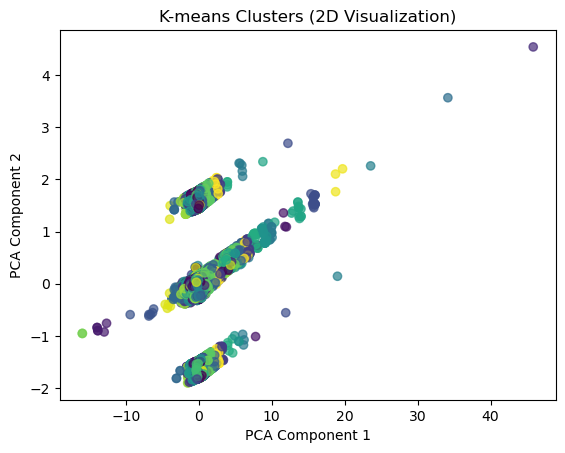

In [223]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.title('K-means Clusters (2D Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [230]:
#This code will now use DBSCAN to categorise users.

In [17]:
df3 = df2

In [18]:
from sklearn.cluster import DBSCAN
# Normalize data if not already normalized
from sklearn.preprocessing import StandardScaler

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(scaled_data)

# Labels will have cluster indices or -1 for noise
df3['Cluster'] = labels

In [19]:
df3

,Quantity,UnitPrice,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,...,StockCode_hash_1,StockCode_hash_2,StockCode_hash_3,StockCode_hash_4,StockCode_hash_5,StockCode_hash_6,StockCode_hash_7,StockCode_hash_8,StockCode_hash_9,Cluster
0,0.279950,0.223823,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,0.017011,0.024463,-0.093009,0.001464,0.022298,0.043072,-0.093073,-0.041366,-3.195750,0
1,0.279950,0.223823,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,0.017011,0.024463,-0.093009,0.001464,0.022298,0.043072,-0.093073,-0.041366,3.174080,1
2,-0.095772,0.223823,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,0.017011,0.024463,-0.093009,0.001464,-3.195248,0.043072,-0.093073,-0.041366,-0.010835,2
3,-0.095772,-0.552996,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,0.017011,0.024463,-0.093009,0.001464,0.022298,2.977332,-0.093073,-0.041366,-0.010835,3
4,0.279950,-0.606570,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,0.017011,0.024463,-0.093009,0.001464,0.022298,-2.891188,-0.093073,-0.041366,-0.010835,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31741,-0.095772,-0.552996,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,0.017011,0.024463,-0.093009,0.001464,0.022298,0.043072,-0.093073,-3.109582,-0.010835,97
31742,-0.283633,-0.218160,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,0.017011,0.024463,3.300840,0.001464,0.022298,0.043072,-0.093073,-0.041366,-0.010835,7
31743,-0.346254,0.330970,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,0.017011,0.024463,-0.093009,3.320393,0.022298,0.043072,-0.093073,-0.041366,-0.010835,72
31744,-0.346254,0.330970,-0.117179,-0.106948,-0.02024,-0.245025,-0.029712,-0.063125,-0.150705,-0.135457,...,0.017011,0.024463,-0.093009,0.001464,0.022298,0.043072,-0.093073,-0.041366,-0.010835,74


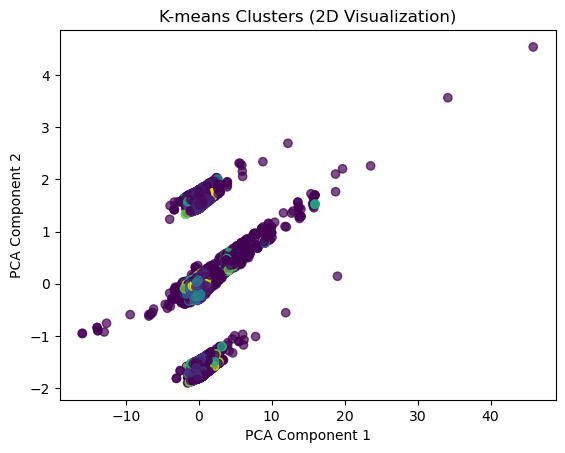

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df3['Cluster'], cmap='viridis', alpha=0.7)
plt.title('K-means Clusters (2D Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [25]:
#Now using Gaussian Mixture Models (GMM)

In [26]:
from sklearn.mixture import GaussianMixture

In [ ]:
df4 = df2

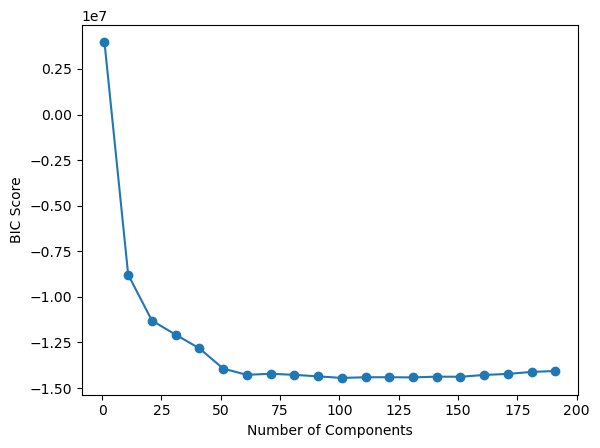

In [31]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

bic_scores = []
for n in range(1, 200,10):  # Test 1 to 10 clusters
    gmm = GaussianMixture(n_components=n, random_state=4)
    gmm.fit(scaled_data)
    bic_scores.append(gmm.bic(scaled_data))

plt.plot(range(1, 200,10), bic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.show()

In [ ]:
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm.fit(scaled_data)

# Predict clusters
labels = gmm.predict(scaled_data)

# Add labels to your dataset
df4['Cluster'] = labels